#### <span style="color:#a50e3e;">Example 4. </span> Derivative calculation of $g(w) = \text{sin}(w^3)$ going  forwards through the computation graph

We plot the simple computation graph decomposing this equation below.

<p><img src="../../mlrefined_images/calculus_images/func_1_p0.png" width="85%" height="auto"></p>

We want to compute $\frac{\mathrm{d}}{\mathrm{d}w}g(w)$, and given the computation graph decomposition of the function we can write this equivalently as $\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}b(a)$.  It is this latter form we will compute using the graph structure.

We can begin by computing the derivative of the first node $a(w)$ with respect to $w$.

<p><img src="../../mlrefined_images/calculus_images/func_1_p1.png" width="85%" height="auto"></p>

Since $a(w) = w^3$ this derivative is directly given by the power rule ine Table 1 as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}a(w) = 3\times w^2
\end{equation}

Moving forward through the graph we now compute the derivative of the next parent node $b(a)$ with respect to $w$.

<p><img src="../../mlrefined_images/calculus_images/func_1_p2.png" width="85%" height="auto"></p>


Here we must use the chain rule from Table 2, writing the derivative formally as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}b(a) = \frac{\mathrm{d}}{\mathrm{d}a}b(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w)   
\end{equation}

We have already computed the latter derivative $\frac{\mathrm{d}}{\mathrm{d}w}a(w)$ above, so all we need is $ \frac{\mathrm{d}}{\mathrm{d}a}b(a)$.  Since $b(a) = \text{sin}(a)$ this derivative is found on the first Table, where we see that $ \frac{\mathrm{d}}{\mathrm{d}a}b(a) = \text{cos}(a)$.  So all together we have the desired derivative calculation 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}b(a) = \frac{\mathrm{d}}{\mathrm{d}a}b(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w) = \text{cos}(a)\times 3\times w^2 = \text{cos}(w^3) \times 3 \times w^2 
\end{equation}

where the final equality follows from subsituting $a = w^3$ into cosine.  So we have $\frac{\mathrm{d}}{\mathrm{d}w}g(w) =\text{cos}(w^3) \times 3 \times w^2 $.  We show the computation graph of this derivative below.

<p><img src="../../mlrefined_images/calculus_images/func1_d1.png" width="55%" height="auto"></p>

In the next Python cell we plot both the original function and this newly derived derivative function.  

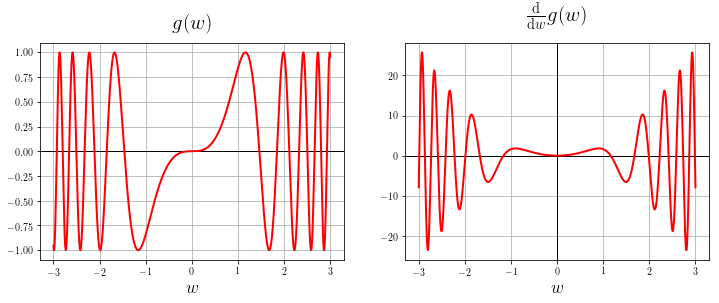

In [5]:
# specify range of input for our functions
w = np.linspace(-3,3,2000)    

# generate original function
g = np.sin(w**3)
function_table = np.stack((w,g), axis=1) 

# generate derivative function
dgdw = np.cos(w**3)*3*w**2
derivative_table = np.stack((w,dgdw), axis=1) 

# use custom plotter to show both functions
baslib.basics_plotter.double_plot(table1 = function_table, table2 = derivative_table,plot_type = 'continuous',xlabel = '$w$',ylabel_1 = '$g(w)$',ylabel_2 = r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',fontsize = 18)

In the previous Section we had plotted the raw derivative values for this function and inquired what the formula of the derivative - plotted in the right panel above - and now we have it.

#### <span style="color:#a50e3e;">Example 6. </span> Computing the derivative of $g(w) =  \frac{\text{cos}(20w)}{w^2 + 1}$  going forwards through the computation graph

We first decompose the function into its computation graph below.

<p><img src="../../mlrefined_images/calculus_images/func_3_p0.png" width="75%" height="auto"></p>

Our goal is to compute $\frac{\mathrm{d}}{\mathrm{d}w}g(w)$, and examining the graph we can see that $\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \frac{\mathrm{d}}{\mathrm{d}w}f(c,e)$, the right hand side we will be calculating using the computation graph.

First - we compute the derivatives of each parent node of $w$, $a(w) = 20\times w$ and $b(w) = w^2$,

<p><img src="../../mlrefined_images/calculus_images/func_3_p1.png" width="75%" height="auto"></p>

both of which are given by formulae (the multiplication by a constant and power rule) on Table 1.

\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}a(w) = 20 \\
\frac{\mathrm{d}}{\mathrm{d}w}b(w) = 2\times w \\
\end{array}

Moving forward to the next parents $c(a) = \text{cos}(a)$ and $d(b) = b + 1$ we compute the derivative of each with respect to $w$.

<p><img src="../../mlrefined_images/calculus_images/func_3_p2.png" width="75%" height="auto"></p>

In both instances we must use the chain rule, with these derivatives then written formally as

\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}c(a) = \frac{\mathrm{d}}{\mathrm{d}a}c(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w) \\
\frac{\mathrm{d}}{\mathrm{d}w}d(b) = \frac{\mathrm{d}}{\mathrm{d}b}d(b)\frac{\mathrm{d}}{\mathrm{d}w}b(w) \\
\end{array}

Given the forms of $c$ and $d$ we can easily compute $\frac{\mathrm{d}}{\mathrm{d}a}c(a) = -\text{sin}(a)$ and $\frac{\mathrm{d}}{\mathrm{d}b}d(b) = 1$, and since we already have computed the derivatives of each child with respect to $w$ we can quickly compute the desired derivatives above

\begin{array}
\
\frac{\mathrm{d}}{\mathrm{d}w}c(a) = \frac{\mathrm{d}}{\mathrm{d}a}c(a)\frac{\mathrm{d}}{\mathrm{d}w}a(w) = -\text{sin}(a)\times20=-20\text{sin}(20w)\\
\frac{\mathrm{d}}{\mathrm{d}w}d(b) = \frac{\mathrm{d}}{\mathrm{d}b}d(b)\frac{\mathrm{d}}{\mathrm{d}w}b(w) = 1\times 2\times w = 2w\\
\end{array}

Next, looking back at the graph, we see the next parent node is $e(d) = \frac{1}{d}$.  

<p><img src="../../mlrefined_images/calculus_images/func_3_p3.png" width="75%" height="auto"></p>

Writing out its derivative with respect to $w$ we have using one application of the chain rule

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}e(d) = \frac{\mathrm{d}}{\mathrm{d}d}e(d)\frac{\mathrm{d}}{\mathrm{d}w}d(b)
\end{equation}

We already have computed the right most derivative, and given the form of $e$ we can easily compute using the power rule from Table 1 $\frac{\mathrm{d}}{\mathrm{d}d}e(d) = -\frac{1}{d^2}$.  So all together we have 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}e(d) = \frac{\mathrm{d}}{\mathrm{d}d}e(d)\frac{\mathrm{d}}{\mathrm{d}w}d(b) = -\frac{1}{d^2}\times 2w = -\frac{2w}{b + 1} =  -\frac{2w}{w^2 + 1}
\end{equation}

Finally, computing the derivative of the last parent node $f(c,e) = c\times e$ with respect to $w$,

<p><img src="../../mlrefined_images/calculus_images/func_3_p4.png" width="75%" height="auto"></p>

we can write using the product rule

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}f(c,e) = \left(\frac{\mathrm{d}}{\mathrm{d}w}c(a)\right) \times e(d) + c(a) \times \left(\frac{\mathrm{d}}{\mathrm{d}w}e(d)\right)
\end{equation}

We have actually already computed the derivatives on the right hand side above, so all that need be done is combine them and backsubstitute in order to express the final calculation in terms of $w$

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}f(c,e) = \left(\frac{\mathrm{d}}{\mathrm{d}w}c(a)\right) \times e(d) + c(a) \times \left(\frac{\mathrm{d}}{\mathrm{d}w}e(d)\right) = \left(-20\text{sin}(20w)\right) \times \frac{1}{w^2 + 1} + \text{cos}(20w)\times \left( -\frac{2w}{w^2 + 1}\right)
\end{equation}

which is our desired derivative.

We plot both the original function and our newly found derivative equation in the Python cell below.

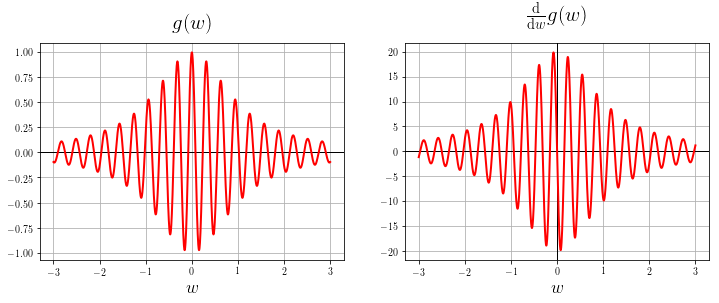

In [7]:
# specify range of input for our functions
w = np.linspace(-3,3,2000)    

# generate original function
g = np.cos(20*w)/(w**2 + 1)
function_table = np.stack((w,g), axis=1) 

# generate derivative function
dgdw = -20*np.sin(20*w)*(1/(w**2 + 1)) + np.cos(20*w)*(-2*w)/(w**2 + 1)
derivative_table = np.stack((w,dgdw), axis=1) 

# use custom plotter to show both functions
baslib.basics_plotter.double_plot(table1 = function_table, table2 = derivative_table,plot_type = 'continuous',xlabel = '$w$',ylabel_1 = '$g(w)$',ylabel_2 = r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',fontsize = 18)